In [22]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture

In [23]:
depression_data = pd.read_csv('Depression.csv')
depression_data.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [24]:
depression_data.dtypes

id              int64
simplicity    float64
fatalism      float64
depression    float64
adjsimp       float64
adjfatal      float64
adjdep        float64
dtype: object

In [25]:
depression_data.isnull().sum()

id            0
simplicity    0
fatalism      0
depression    0
adjsimp       0
adjfatal      0
adjdep        0
dtype: int64

In [26]:
depression_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,82.0,41.500000,23.815261,1.00000,21.250000,41.500000,61.75000,82.00000
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


In [27]:
depression_data.drop('id', axis=1, inplace=True)

In [28]:
depression_data.drop(['simplicity', 'fatalism', 'depression'], axis=1, inplace=True)

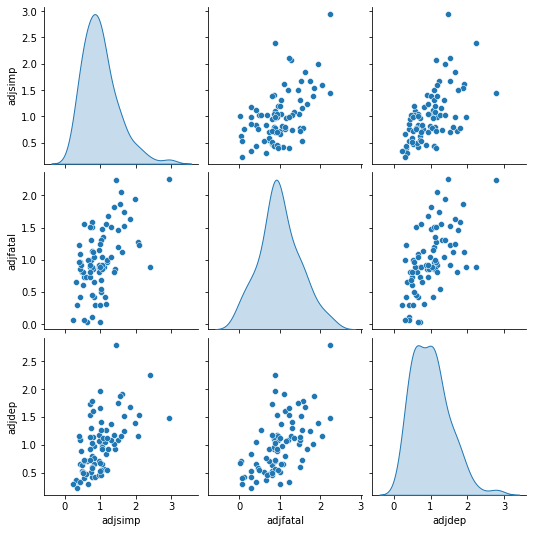

In [29]:
sns.pairplot(depression_data, diag_kind='kde')

#### depression has 2 gaussians, we need atleast 2 clusters

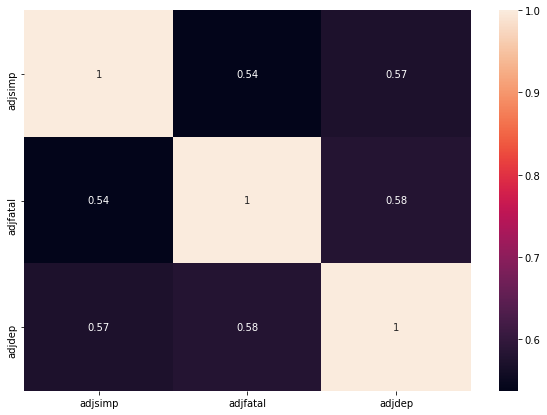

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(depression_data.corr(), annot=True)
plt.show()

In [35]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(depression_data), columns=depression_data.columns)
scaled_df

,adjsimp,adjfatal,adjdep,label
0,-0.484282,-1.797534,-1.169856,1.130388
1,-0.549018,-0.001710,-0.972187,-0.884652
2,-0.761136,-1.935619,-0.589627,1.130388
3,-0.331588,-1.162751,-0.691450,1.130388
4,-1.052499,-0.373826,-0.935361,-0.884652
...,...,...,...,...
77,-0.561092,1.006939,0.300095,-0.212972
78,1.202396,2.113246,0.330884,-1.556332
79,2.807475,-0.223164,2.504358,1.802068
80,0.633737,0.081660,0.747633,-0.212972


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

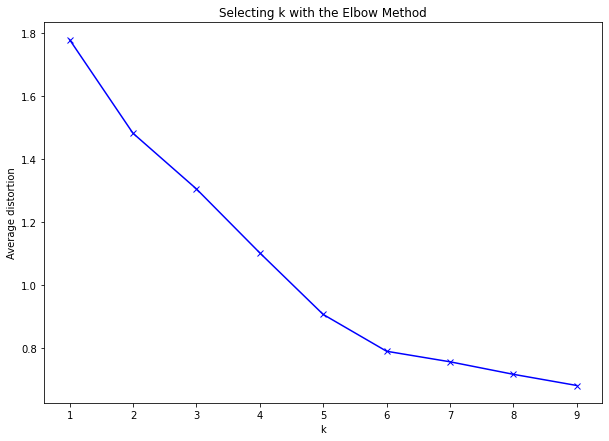

In [36]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(scaled_df)
    prediction = model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1))/ len(scaled_df))
    
    # cdist(support_df_scaled, model.cluster_centers_) - distance b/w each point and the model cluster centroid
    # np.min(cdist(support_df_scaled, model.cluster_centers_) - take the minimum distance
    # sum(np.min(cdist(support_df_scaled, model.cluster_centers_)))/ len(support_df_scaled) - calculate the mean
plt.figure(figsize=(10,7))    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [37]:
kmm = KMeans(n_clusters=6, random_state=7)
kmm.fit(scaled_df)
prediction = kmm.predict(scaled_df)
depression_data['label'] = prediction
depression_data['label'].unique()

array([0, 2, 5, 4, 1, 3], dtype=int32)

In [33]:
depression_data.head(10)

,adjsimp,adjfatal,adjdep,label
0,0.75934,0.10673,0.41865,4
1,0.72717,0.99915,0.51688,1
2,0.62176,0.03811,0.70699,4
3,0.83522,0.42218,0.65639,4
4,0.47697,0.81423,0.53518,1
5,0.40664,1.23261,0.34042,1
6,0.84556,0.29789,0.42168,4
7,1.49961,1.20366,1.08127,0
8,0.31082,0.65651,0.36337,1
9,1.40836,0.85391,0.91711,3
